# Introduction & Set up

In [1]:
from google.colab import drive
## mount the file path
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
## import the file
housing_dataset = pd.read_csv('/content/drive/MyDrive/####Your File Path####/housing_Ottawa.csv')

In [6]:
# Count the number of entries in the housing dataset
housing_dataset.count()

SALE TYPE                                                                                      3477
SOLD DATE                                                                                      3471
PROPERTY TYPE                                                                                  3476
ADDRESS                                                                                        3476
CITY                                                                                           3476
STATE OR PROVINCE                                                                              3476
ZIP OR POSTAL CODE                                                                             3476
PRICE                                                                                          3471
BEDS                                                                                           3397
BATHS                                                                                          3394


# Data Cleaning

In [11]:
# Dropping unnecessary columns from the 'housing_dataset' DataFrame
housing_dataset_C = housing_dataset.drop(labels =['ADDRESS',"HOA/MONTH",'ZIP OR POSTAL CODE','SALE TYPE','DAYS ON MARKET','SQUARE FEET','$/SQUARE FEET','STATE OR PROVINCE','NEXT OPEN HOUSE START TIME','NEXT OPEN HOUSE END TIME','URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)','FAVORITE','INTERESTED'], axis=1, inplace=False)

In [32]:
# Cleaning the housing dataset by removing rows with missing values
housing_dataset_cleaned = housing_dataset_C.dropna()
housing_dataset_cleaned.head()

,SOLD DATE,PROPERTY TYPE,CITY,PRICE,BEDS,BATHS,LOCATION,LOT SIZE,YEAR BUILT,STATUS,SOURCE,MLS#,LATITUDE,LONGITUDE
0,September-15-2022,Single Family Residential,Ottawa,530000.0,2.0,2.5,Half Moon Bay,930.0,2015.0,Sold,OREB,1312040,45.244388,-75.739479
1,September-13-2022,Single Family Residential,Ottawa,967500.0,4.0,3.5,Half Moon Bay,9534.0,2014.0,Sold,OREB,1309411,45.243837,-75.734432
2,September-15-2022,Single Family Residential,Ottawa,979556.0,3.0,3.0,Manotick South Island,22259.0,1982.0,Sold,OREB,1310196,45.226339,-75.676083
3,September-15-2022,Single Family Residential,Ottawa,695000.0,3.0,2.5,Manotick,25046.0,1978.0,Sold,OREB,1311784,45.209620,-75.649400
7,September-21-2022,Single Family Residential,Ottawa,805000.0,3.0,2.5,Half Moon Bay,3099.0,2012.0,Sold,OREB,1312112,45.247072,-75.736080


In [35]:
# Creat a sub data set with only one property type and one city
housing_dataset_cleaned_SFH = housing_dataset_cleaned[housing_dataset_cleaned['PROPERTY TYPE'] == 'Single Family Residential']
housing_dataset_cleaned_SFH = housing_dataset_cleaned.drop(labels =['PROPERTY TYPE'], axis=1, inplace=False)
housing_dataset_cleaned_SFH.head()

,SOLD DATE,CITY,PRICE,BEDS,BATHS,LOCATION,LOT SIZE,YEAR BUILT,STATUS,SOURCE,MLS#,LATITUDE,LONGITUDE
0,September-15-2022,Ottawa,530000.0,2.0,2.5,Half Moon Bay,930.0,2015.0,Sold,OREB,1312040,45.244388,-75.739479
1,September-13-2022,Ottawa,967500.0,4.0,3.5,Half Moon Bay,9534.0,2014.0,Sold,OREB,1309411,45.243837,-75.734432
2,September-15-2022,Ottawa,979556.0,3.0,3.0,Manotick South Island,22259.0,1982.0,Sold,OREB,1310196,45.226339,-75.676083
3,September-15-2022,Ottawa,695000.0,3.0,2.5,Manotick,25046.0,1978.0,Sold,OREB,1311784,45.209620,-75.649400
7,September-21-2022,Ottawa,805000.0,3.0,2.5,Half Moon Bay,3099.0,2012.0,Sold,OREB,1312112,45.247072,-75.736080


#Data exploration

In [61]:
# Grouping the cleaned housing dataset for Single Family Homes (SFH) by CITY
city_stats = housing_dataset_cleaned_SFH.groupby('CITY').agg({
    'PRICE': ['mean', 'median'],  # Calculating mean and median prices for each city
    'BEDS': 'mean',  # Calculating the mean number of bedrooms for each city
    'BATHS': 'mean'  # Calculating the mean number of bathrooms for each city
})

# Displaying the aggregated city statistics
city_stats

PRICE                 BEDS     BATHS
                          mean     median      mean      mean
CITY                                                         
Ashton            1.120000e+06  1120000.0  4.000000  3.000000
Carlsbad Springs  5.900000e+05   590000.0  3.000000  1.500000
Carp              7.536111e+05   815000.0  2.555556  2.555556
Cumberland        8.500000e+05   850000.0  3.000000  3.000000
Dunrobin          8.671665e+05   895000.0  3.000000  2.083333
Gloucester        8.684125e+05   801250.0  3.500000  2.250000
Greely            1.550000e+06  1550000.0  4.000000  4.500000
Kanata            7.065090e+05   670000.0  3.105263  2.519737
Kars              8.250000e+05   825000.0  2.000000  3.000000
Kinburn           8.299000e+05   829900.0  3.000000  2.500000
Manotick          1.031486e+06   999000.0  2.975610  2.670732
Metcalfe          7.450000e+05   745000.0  3.000000  2.000000
Nepean            7.622522e+05   680000.0  3.264368  2.534483
Orleans           7.456059e+05   669000.0  3.235294  2.588235
Osgoode           3.750000e+05   375000.0  2.000000  1.500000
Ottawa            8.134974e+05   722500.0  3.154499  2.395586
Richmond          7.912024e+05   755000.0  3.400000  2.500000
Stittsville       8.448452e+05   771250.0  3.145161  2.814516
Vernon            5.150000e+05   515000.0  3.000000  2.000000

#Feature Engineering

In [38]:
# Coordinates of the town hall
town_hall_coordinates = (45.420443638577396, -75.69077978731038)

In [39]:
# Add a distance to townhall feature
import numpy as np

# Add a distance to townhall feature using euclidean distance
housing_dataset_cleaned_SFH['DISTANCE_TO_TOWNHALL'] = np.sqrt(
    (housing_dataset_cleaned_SFH['LATITUDE'] - town_hall_coordinates[0])**2 +
    (housing_dataset_cleaned_SFH['LONGITUDE'] - town_hall_coordinates[1])**2
)

# Display the DataFrame with the new column
housing_dataset_cleaned_SFH.head()

,SOLD DATE,CITY,PRICE,BEDS,BATHS,LOCATION,LOT SIZE,YEAR BUILT,STATUS,SOURCE,MLS#,LATITUDE,LONGITUDE,DISTANCE_TO_TOWNHALL
0,September-15-2022,Ottawa,530000.0,2.0,2.5,Half Moon Bay,930.0,2015.0,Sold,OREB,1312040,45.244388,-75.739479,0.182667
1,September-13-2022,Ottawa,967500.0,4.0,3.5,Half Moon Bay,9534.0,2014.0,Sold,OREB,1309411,45.243837,-75.734432,0.181922
2,September-15-2022,Ottawa,979556.0,3.0,3.0,Manotick South Island,22259.0,1982.0,Sold,OREB,1310196,45.226339,-75.676083,0.194660
3,September-15-2022,Ottawa,695000.0,3.0,2.5,Manotick,25046.0,1978.0,Sold,OREB,1311784,45.209620,-75.649400,0.214846
7,September-21-2022,Ottawa,805000.0,3.0,2.5,Half Moon Bay,3099.0,2012.0,Sold,OREB,1312112,45.247072,-75.736080,0.179193


Import Bus stop coordinates from an OverPass export as:
coordinates_array_flipped

In [ ]:
import geopandas as gpd

# Path to the GeoJSON file in your Google Drive
geojson_path = '/content/drive/MyDrive/####Your File Path####/export.geojson'

# Read GeoJSON into a GeoDataFrame
gdf = gpd.read_file(geojson_path)

# Display the GeoDataFrame
print(gdf.head())

# Extract coordinates as a new array
coordinates_array = gdf.geometry.apply(lambda point: (point.x, point.y)).tolist()

# Extract coordinates with flipped order as a new array
coordinates_array_flipped = gdf.geometry.apply(lambda point: (point.y, point.x)).tolist()

# Display the new array of flipped coordinates
coordinates_array_flipped

In [66]:
# Add the closest bus stop as a euclidean distance to the table

# Function to find the closest bus stop coordinate based on Euclidean distance
def find_closest_coordinate(row, bus_stop_coordinates):
    # Calculate Euclidean distances between the current location and all bus stop coordinates
    distances = np.sqrt((row['LATITUDE'] - bus_stop_coordinates[:, 0])**2 + (row['LONGITUDE'] - bus_stop_coordinates[:, 1])**2)

    # Find the index of the minimum distance
    closest_index = np.min(distances)

    return closest_index

# Function to add a new column with the index of the closest bus stop to the DataFrame
def add_closest_bus_stop_column(df, bus_stop_coordinates):
    # Apply the find_closest_coordinate function to each row in the DataFrame
    df['CLOSEST_BUS_STOP_INDEX'] = df.apply(lambda row: find_closest_coordinate(row, bus_stop_coordinates), axis=1)
    return df

# Add new columns to 'housing_dataset_cleaned_SFH' with distances and closest bus stop index
housing_dataset_cleaned_SFH = add_closest_bus_stop_column(housing_dataset_cleaned_SFH, np.array(coordinates_array_flipped))

# Display the updated DataFrame
housing_dataset_cleaned_SFH.head()


,SOLD DATE,CITY,PRICE,BEDS,BATHS,LOCATION,LOT SIZE,YEAR BUILT,STATUS,SOURCE,MLS#,LATITUDE,LONGITUDE,DISTANCE_TO_TOWNHALL,CLOSEST_BUS_STOP_INDEX
0,September-15-2022,Ottawa,530000.0,2.0,2.5,Half Moon Bay,930.0,2015.0,Sold,OREB,1312040,45.244388,-75.739479,0.182667,0.002896
1,September-13-2022,Ottawa,967500.0,4.0,3.5,Half Moon Bay,9534.0,2014.0,Sold,OREB,1309411,45.243837,-75.734432,0.181922,0.001756
2,September-15-2022,Ottawa,979556.0,3.0,3.0,Manotick South Island,22259.0,1982.0,Sold,OREB,1310196,45.226339,-75.676083,0.194660,0.005538
3,September-15-2022,Ottawa,695000.0,3.0,2.5,Manotick,25046.0,1978.0,Sold,OREB,1311784,45.209620,-75.649400,0.214846,0.021176
7,September-21-2022,Ottawa,805000.0,3.0,2.5,Half Moon Bay,3099.0,2012.0,Sold,OREB,1312112,45.247072,-75.736080,0.179193,0.001931


#Graphing the data

<ipython-input-67-3914ddbac7c8>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(housing_dataset_cleaned_SFH.corr(), annot=True, cmap="YlGnBu")


<Axes: >

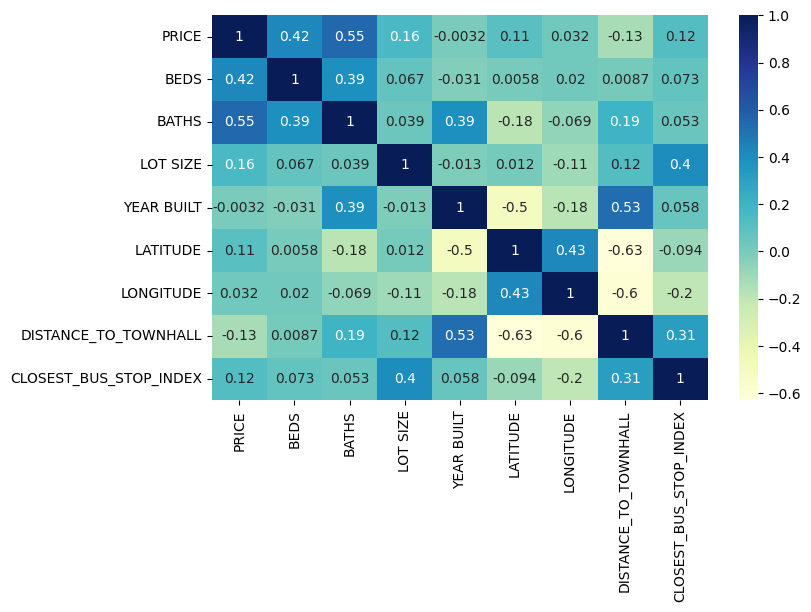

In [67]:
# Importing the seaborn and matplotlib.pyplot libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the size of the figure for better visibility of the heatmap
plt.figure(figsize=(8, 5))

# Creating a heatmap to visualize the correlation matrix of the cleaned housing dataset for Single-Family Homes (SFH)
# The 'corr()' function calculates the correlation coefficients between different columns in the DataFrame
sns.heatmap(housing_dataset_cleaned_SFH.corr(), annot=True, cmap="YlGnBu")

#Mapping the houses

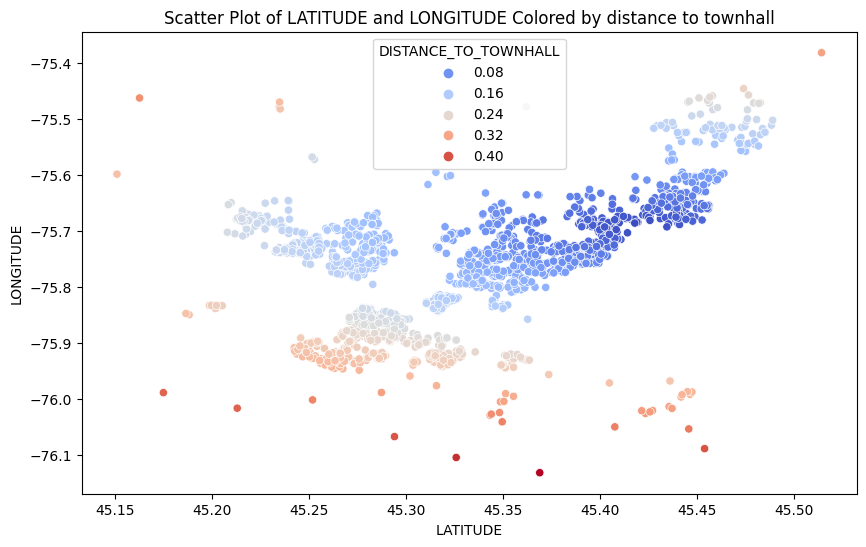

In [60]:
## Mapping all the points colour coded by distance to townhall
plt.figure(figsize=(10, 6))
sns.scatterplot(x="LATITUDE", y="LONGITUDE", hue="DISTANCE_TO_TOWNHALL", data=housing_dataset_cleaned_SFH, palette="coolwarm")
plt.title("Scatter Plot of LATITUDE and LONGITUDE Colored by distance to townhall")
plt.show()


In [ ]:
## Mapping all the points colour coded by distance to closest bus stop
plt.figure(figsize=(10, 6))
sns.scatterplot(x="LATITUDE", y="LONGITUDE", hue="CLOSEST_BUS_STOP_INDEX", data=housing_dataset_cleaned_SFH, palette="coolwarm")
plt.title("Scatter Plot of LATITUDE and LONGITUDE Colored by distance to closest bus stop")
plt.show()


In [46]:
## Making a map definition that takes in a file with LATITUDE & LONGITUDE.
import folium
from folium.plugins import MarkerCluster

map = folium.Map(prefer_canvas=True)

def plot_redfin_data(file_path):

    dataset = file_path

    # Create a folium map centered at the mean latitude and longitude
    map_center = [dataset['LATITUDE'].mean(), dataset['LONGITUDE'].mean()]
    my_map = folium.Map(location=map_center, zoom_start=12)

    # Create a MarkerCluster layer for better performance
    marker_cluster = MarkerCluster().add_to(my_map)

    # Add markers to the map for each data point
    for index, row in dataset.iterrows():
        folium.Marker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            popup=f"Price: ${row['PRICE']:,}",
            icon=None
        ).add_to(marker_cluster)

    # Display the map
    return my_map

In [48]:
# Call the function with your data set
plot_redfin_data(housing_dataset_cleaned_SFH)